In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("BRCA.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
print(df.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [ ]:
df.loc[df.Patient_ID.isnull()]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64


In [ ]:
for col in df.select_dtypes(object):

  print("-"*50)
  print(df[col].value_counts())

--------------------------------------------------
TCGA-A2-A0EX    1
TCGA-E2-A153    1
TCGA-A2-A0CV    1
TCGA-XX-A89A    1
TCGA-BH-A0DI    1
               ..
TCGA-E2-A15M    1
TCGA-A7-A4SB    1
TCGA-AO-A0JJ    1
TCGA-A8-A0AD    1
TCGA-BH-A0GY    1
Name: Patient_ID, Length: 317, dtype: int64
--------------------------------------------------
FEMALE    313
MALE        4
Name: Gender, dtype: int64
--------------------------------------------------
II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64
--------------------------------------------------
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64
--------------------------------------------------
Positive    317
Name: ER status, dtype: int64
--------------------------------------------------
Positive    317
Name: PR status, dtype: int64
--------------------------------------------------
Negative    288
Positive     29
Name: HER2 s

In [ ]:
# Change datatype of dates in datetime.
df['Date_of_Surgery'] = pd.to_datetime(df.Date_of_Surgery, format='%d-%b-%y')
df['Date_of_Last_Visit'] = pd.to_datetime(df.Date_of_Last_Visit, format='%d-%b-%y')

In [ ]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [ ]:
df['Age'] = df.Age.astype(int)
bins =[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10s','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

df['AgeGrp']=pd.cut(df.Age, labels=labels, bins=bins, right=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 

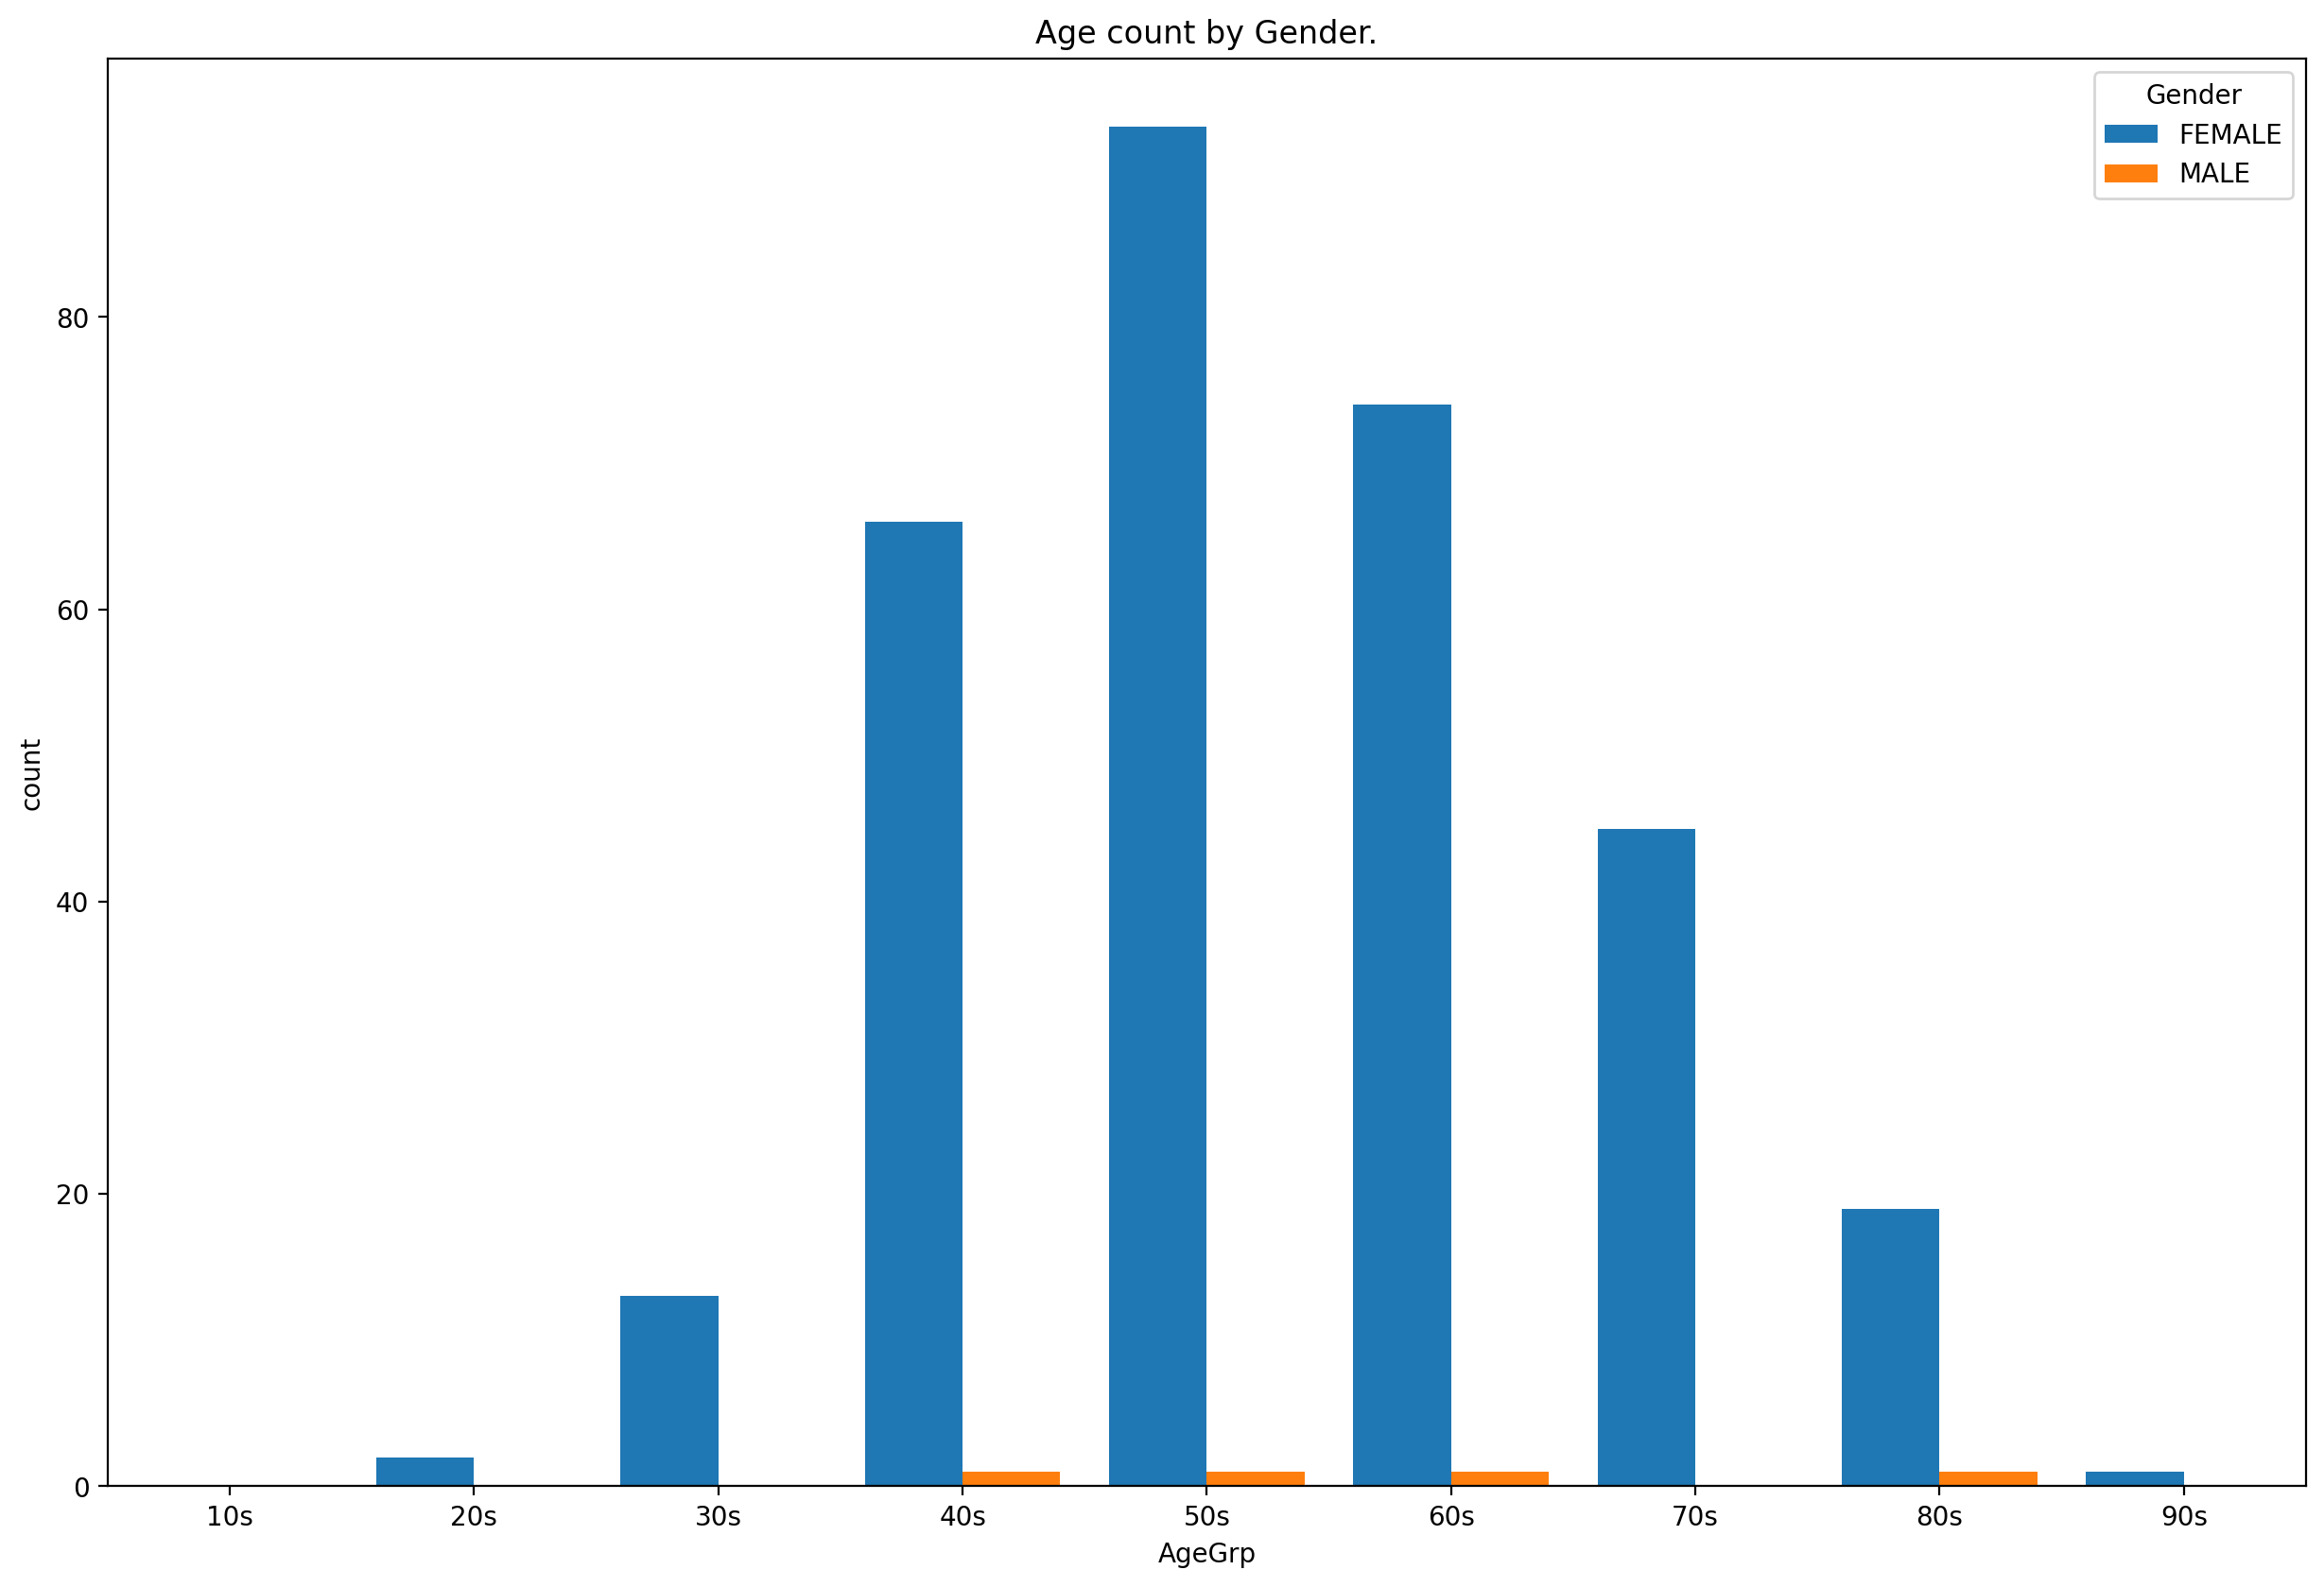

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='AgeGrp', hue='Gender', data=df,saturation=1.2)

plt.title("Age count by Gender.")
plt.show()

In [ ]:
a = df.groupby(by=['Tumour_Stage']).mean()[['Protein1','Protein2','Protein3','Protein4']]
a

,Protein1,Protein2,Protein3,Protein4
Tumour_Stage,,,,
I,-0.007066,0.993546,-0.143623,0.063371
II,-0.008442,0.972304,-0.076174,0.005261
III,-0.086872,0.862104,-0.101548,-0.034042


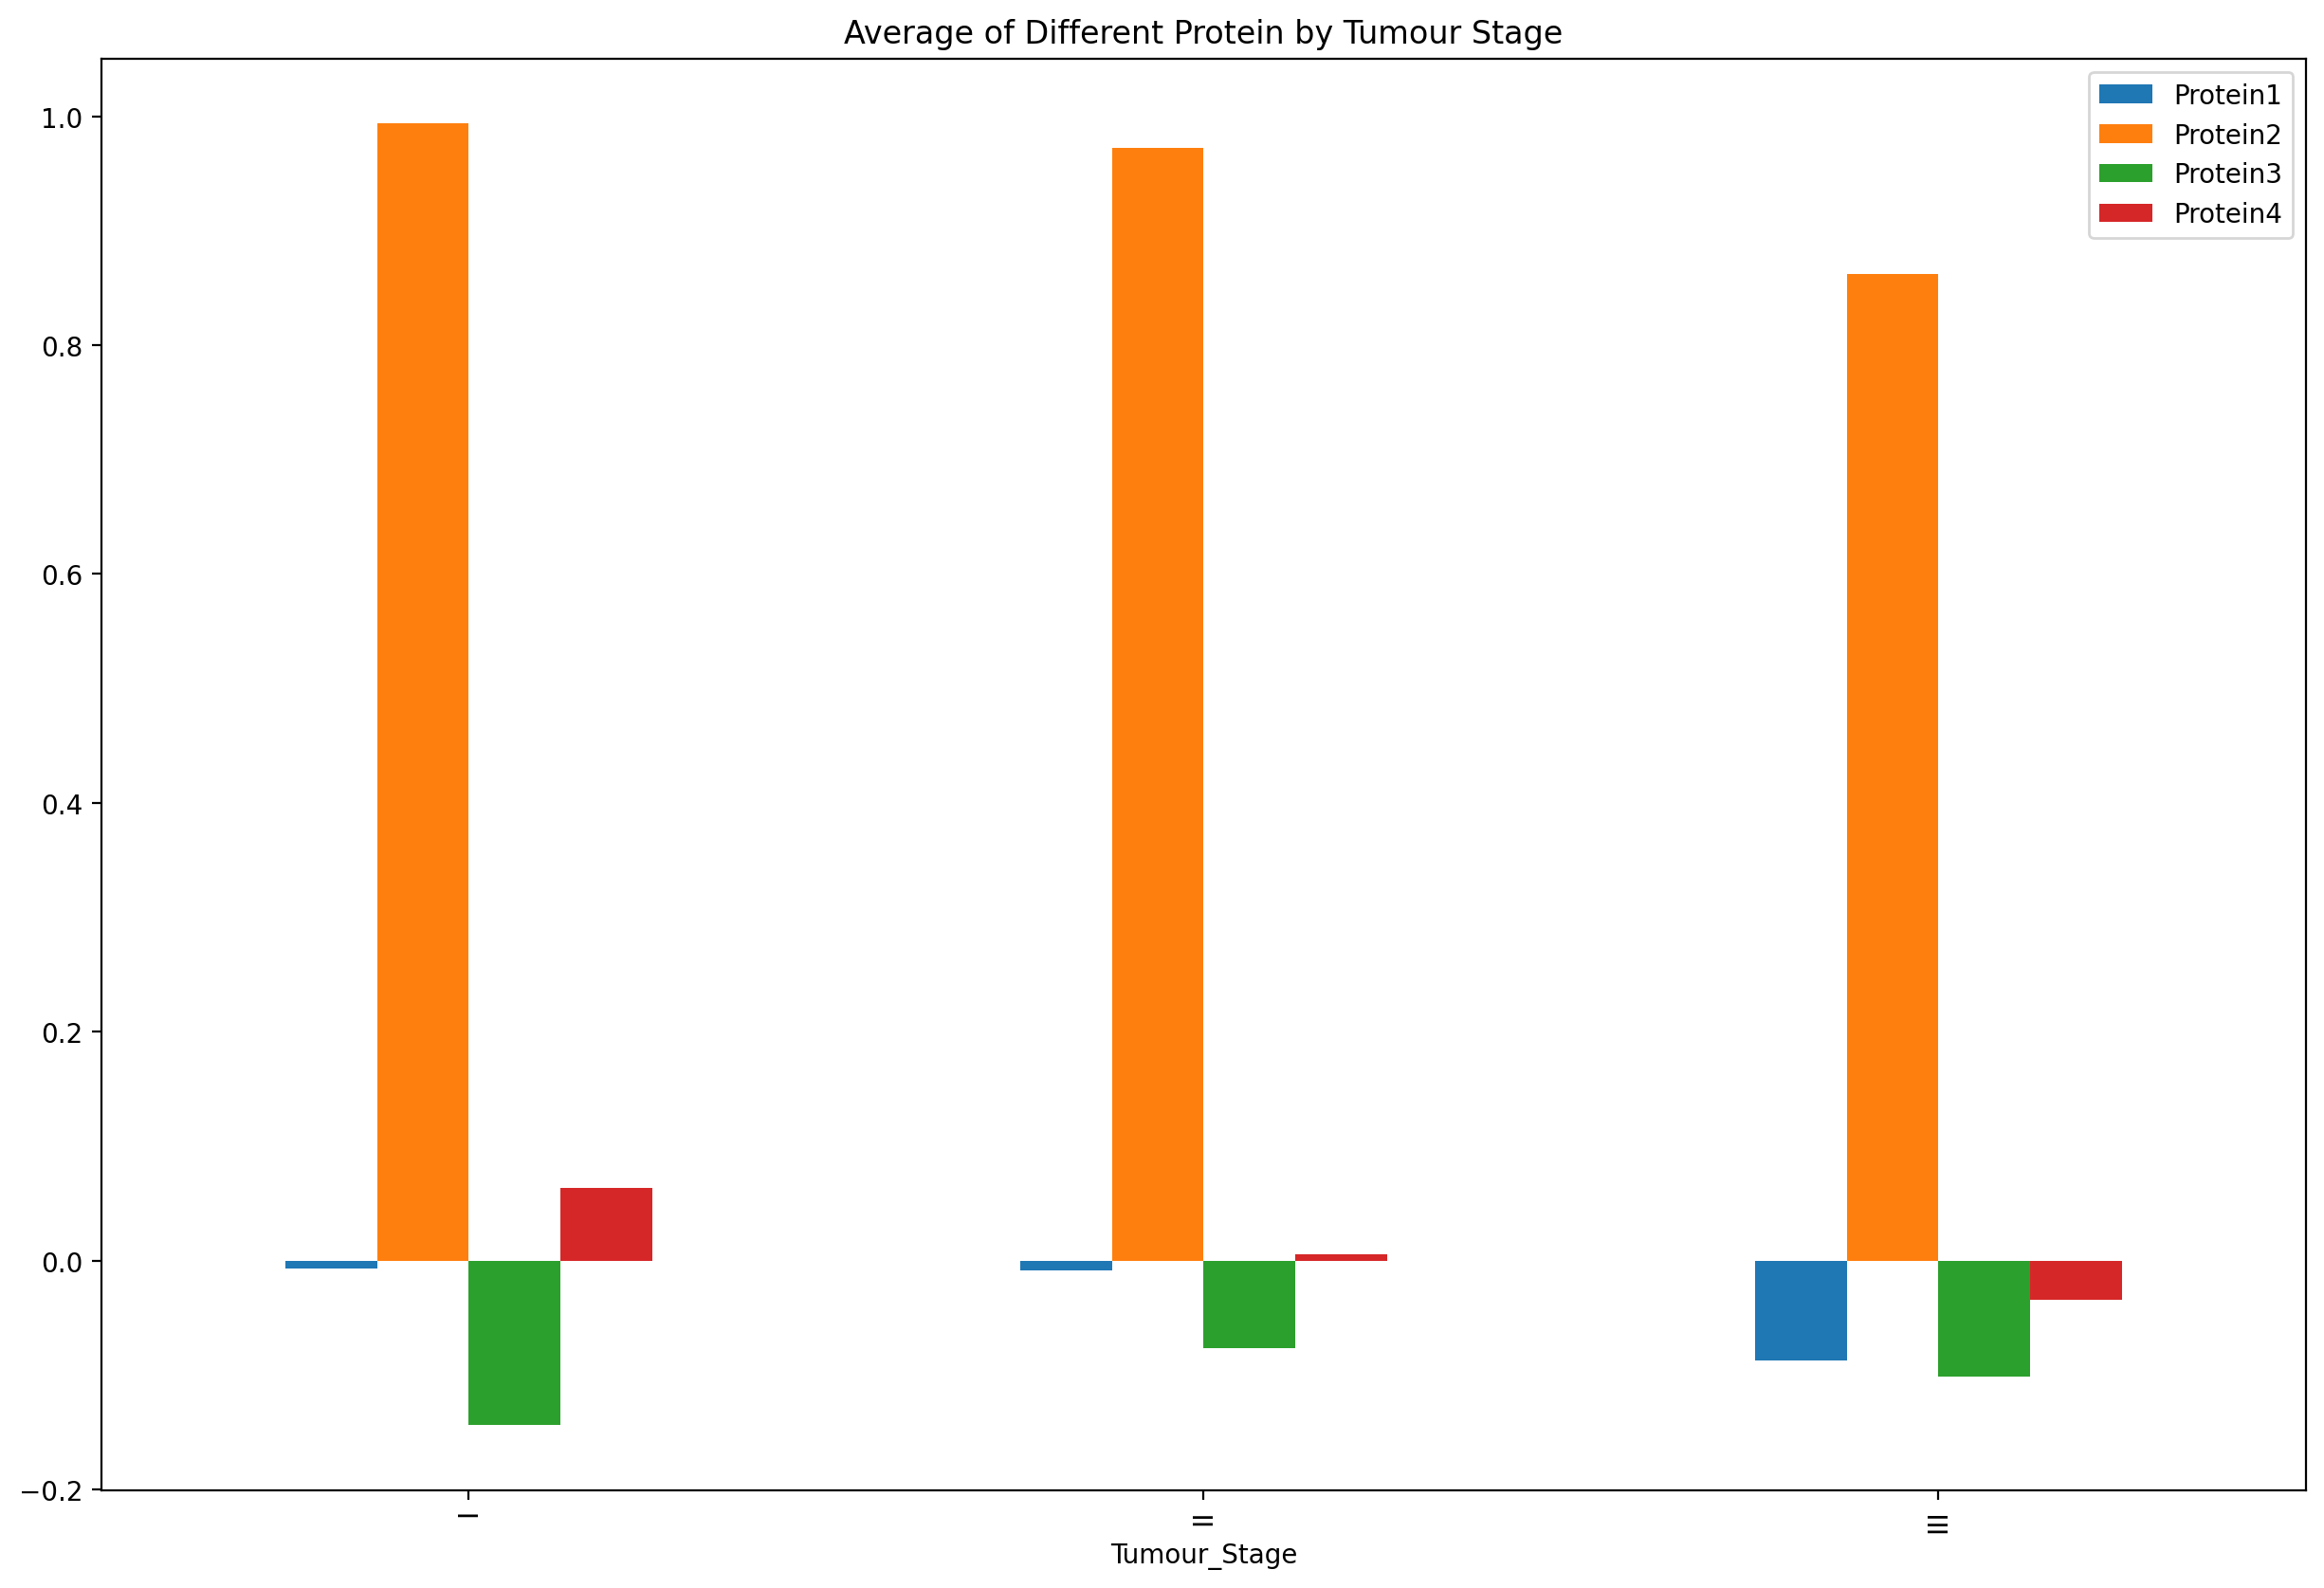

In [ ]:
a.plot(kind='bar', figsize=(15,10))

plt.title("Average of Different Protein by Tumour Stage")
plt.show()

In [ ]:
a = pd.DataFrame(df.groupby(['Tumour_Stage','Histology']).count()['Patient_ID'])
a

Patient_ID
Tumour_Stage Histology                                 
I            Infiltrating Ductal Carcinoma           47
             Infiltrating Lobular Carcinoma          10
             Mucinous Carcinoma                       3
II           Infiltrating Ductal Carcinoma          120
             Infiltrating Lobular Carcinoma          51
             Mucinous Carcinoma                       9
III          Infiltrating Ductal Carcinoma           57
             Infiltrating Lobular Carcinoma          20

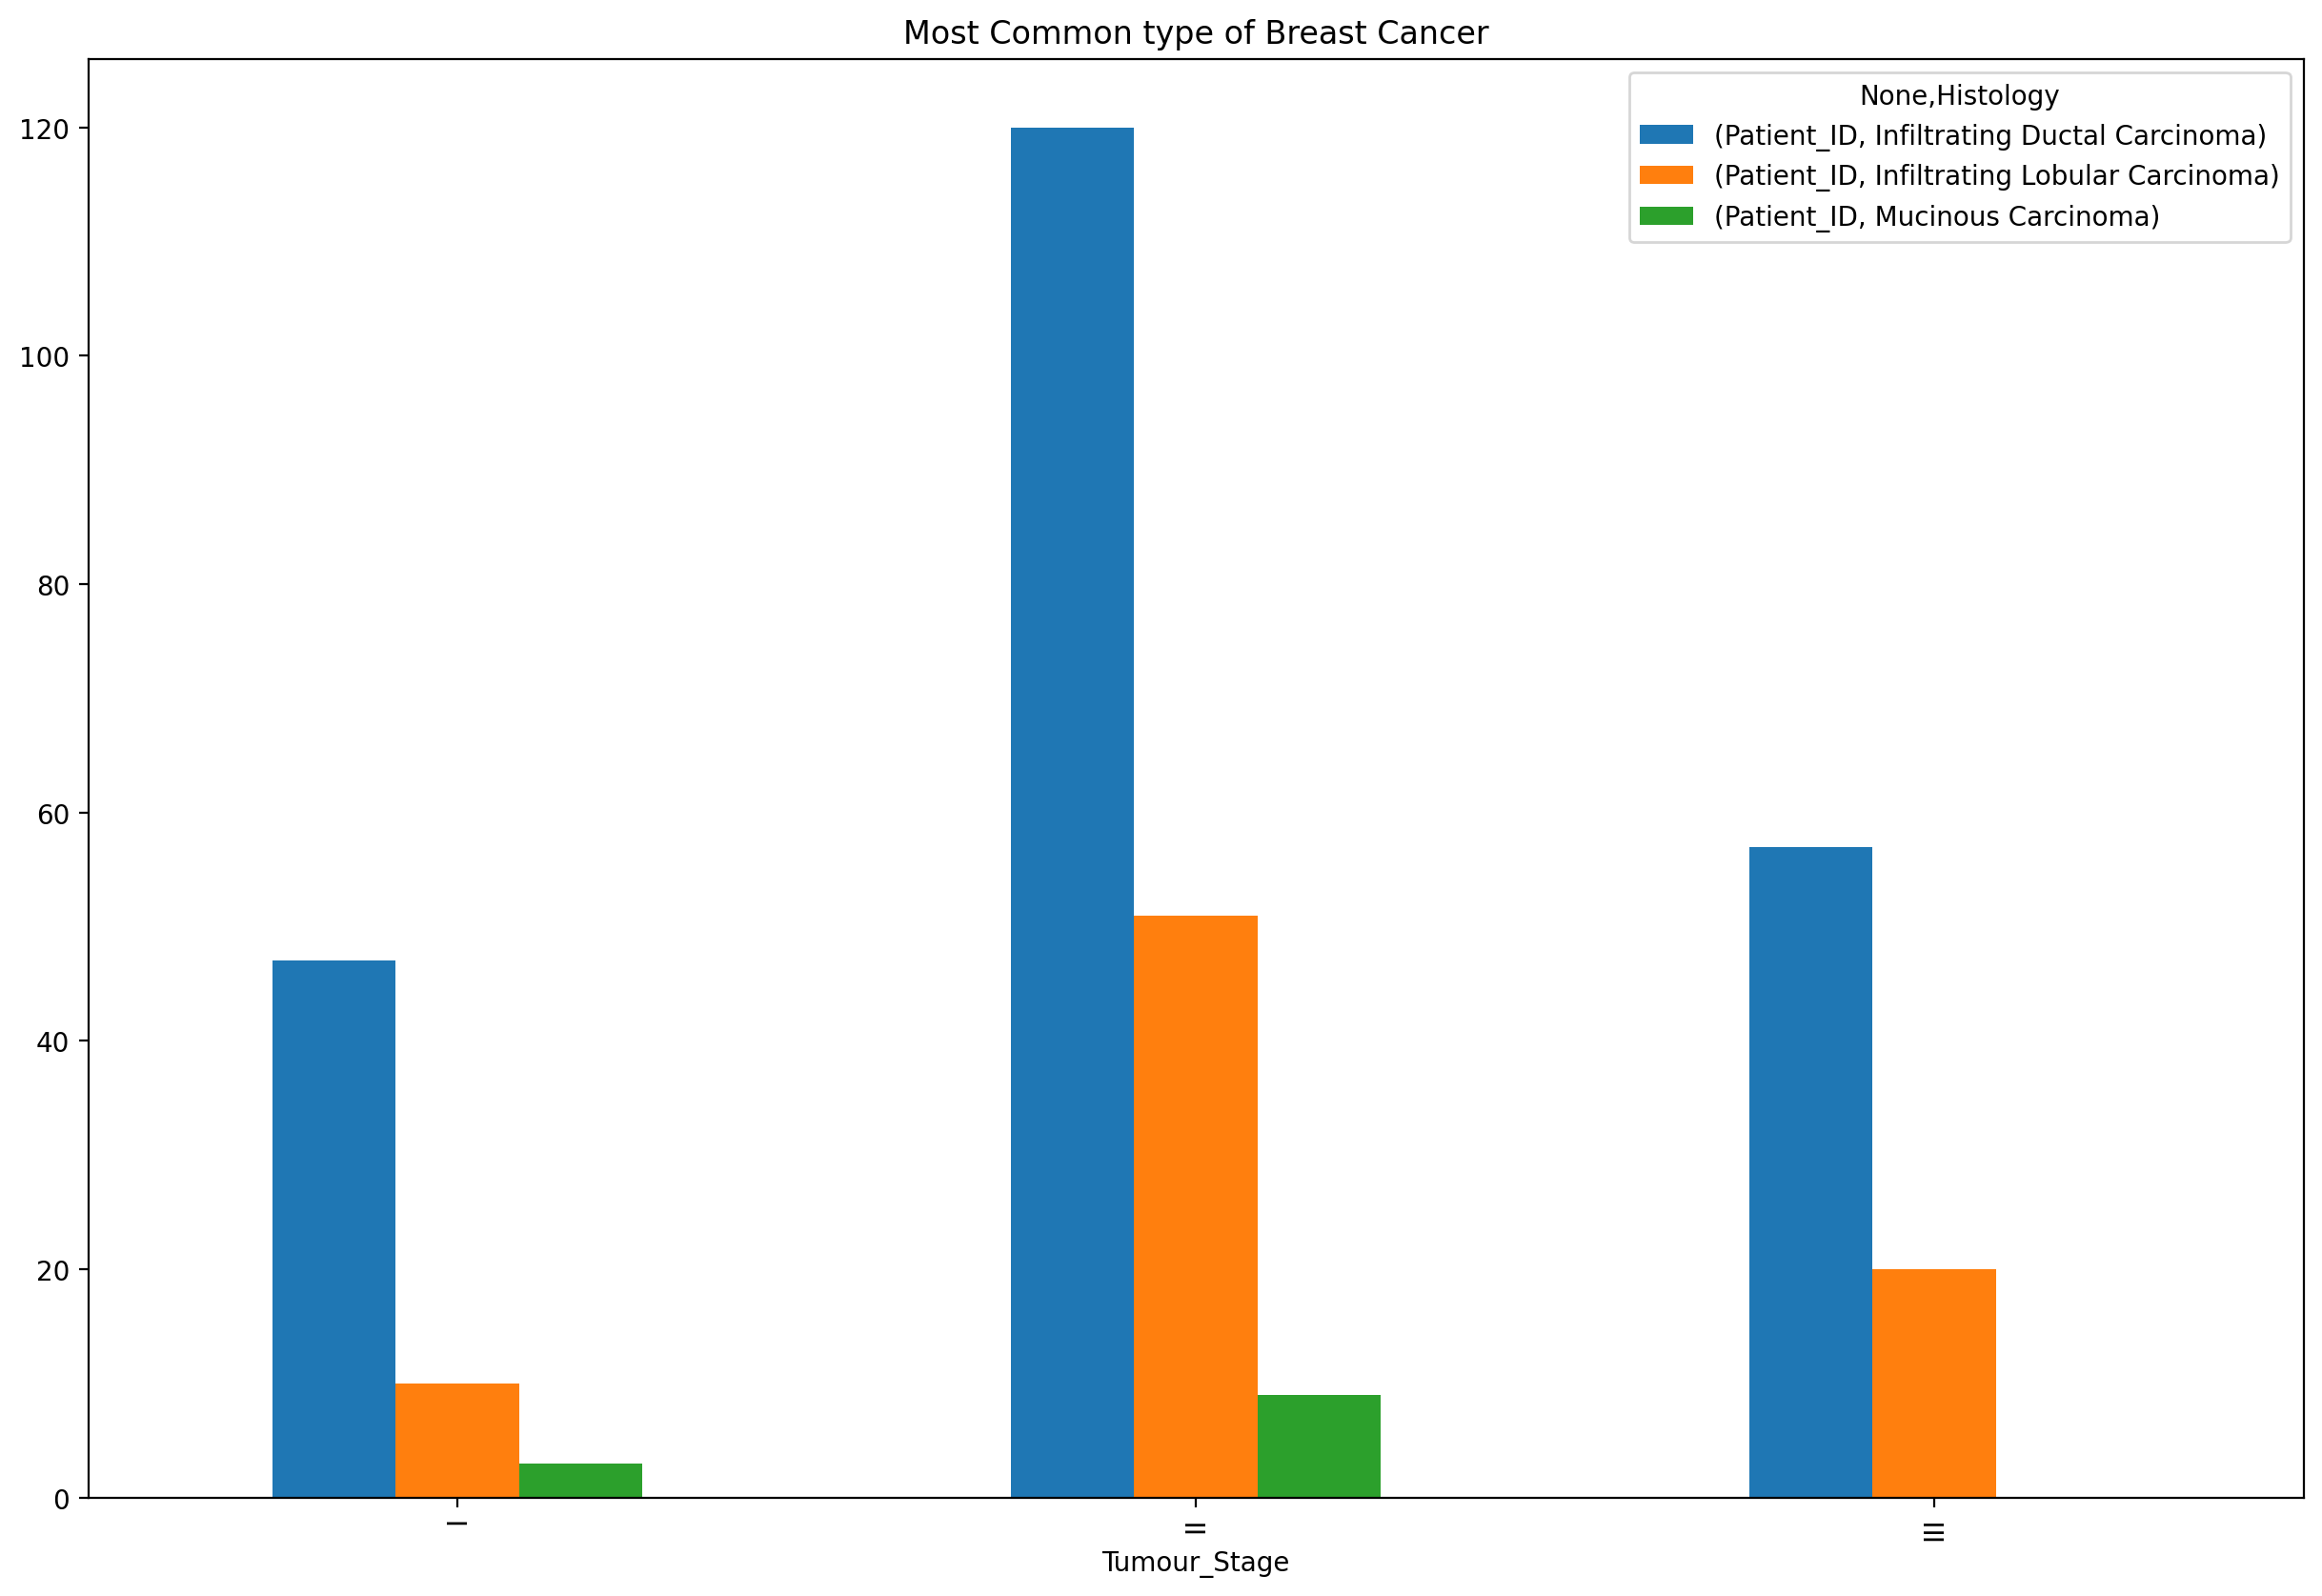

In [ ]:
a.unstack().plot(kind='bar',figsize=(15,10),title="Most Common type of Breast Cancer")
plt.show()

In [ ]:
a = pd.DataFrame(df.groupby(['Surgery_type','Histology']).count()['Patient_ID'])
a

Patient_ID
Surgery_type                Histology                                 
Lumpectomy                  Infiltrating Ductal Carcinoma           48
                            Infiltrating Lobular Carcinoma          13
                            Mucinous Carcinoma                       5
Modified Radical Mastectomy Infiltrating Ductal Carcinoma           61
                            Infiltrating Lobular Carcinoma          23
                            Mucinous Carcinoma                       5
Other                       Infiltrating Ductal Carcinoma           66
                            Infiltrating Lobular Carcinoma          31
Simple Mastectomy           Infiltrating Ductal Carcinoma           49
                            Infiltrating Lobular Carcinoma          14
                            Mucinous Carcinoma                       2

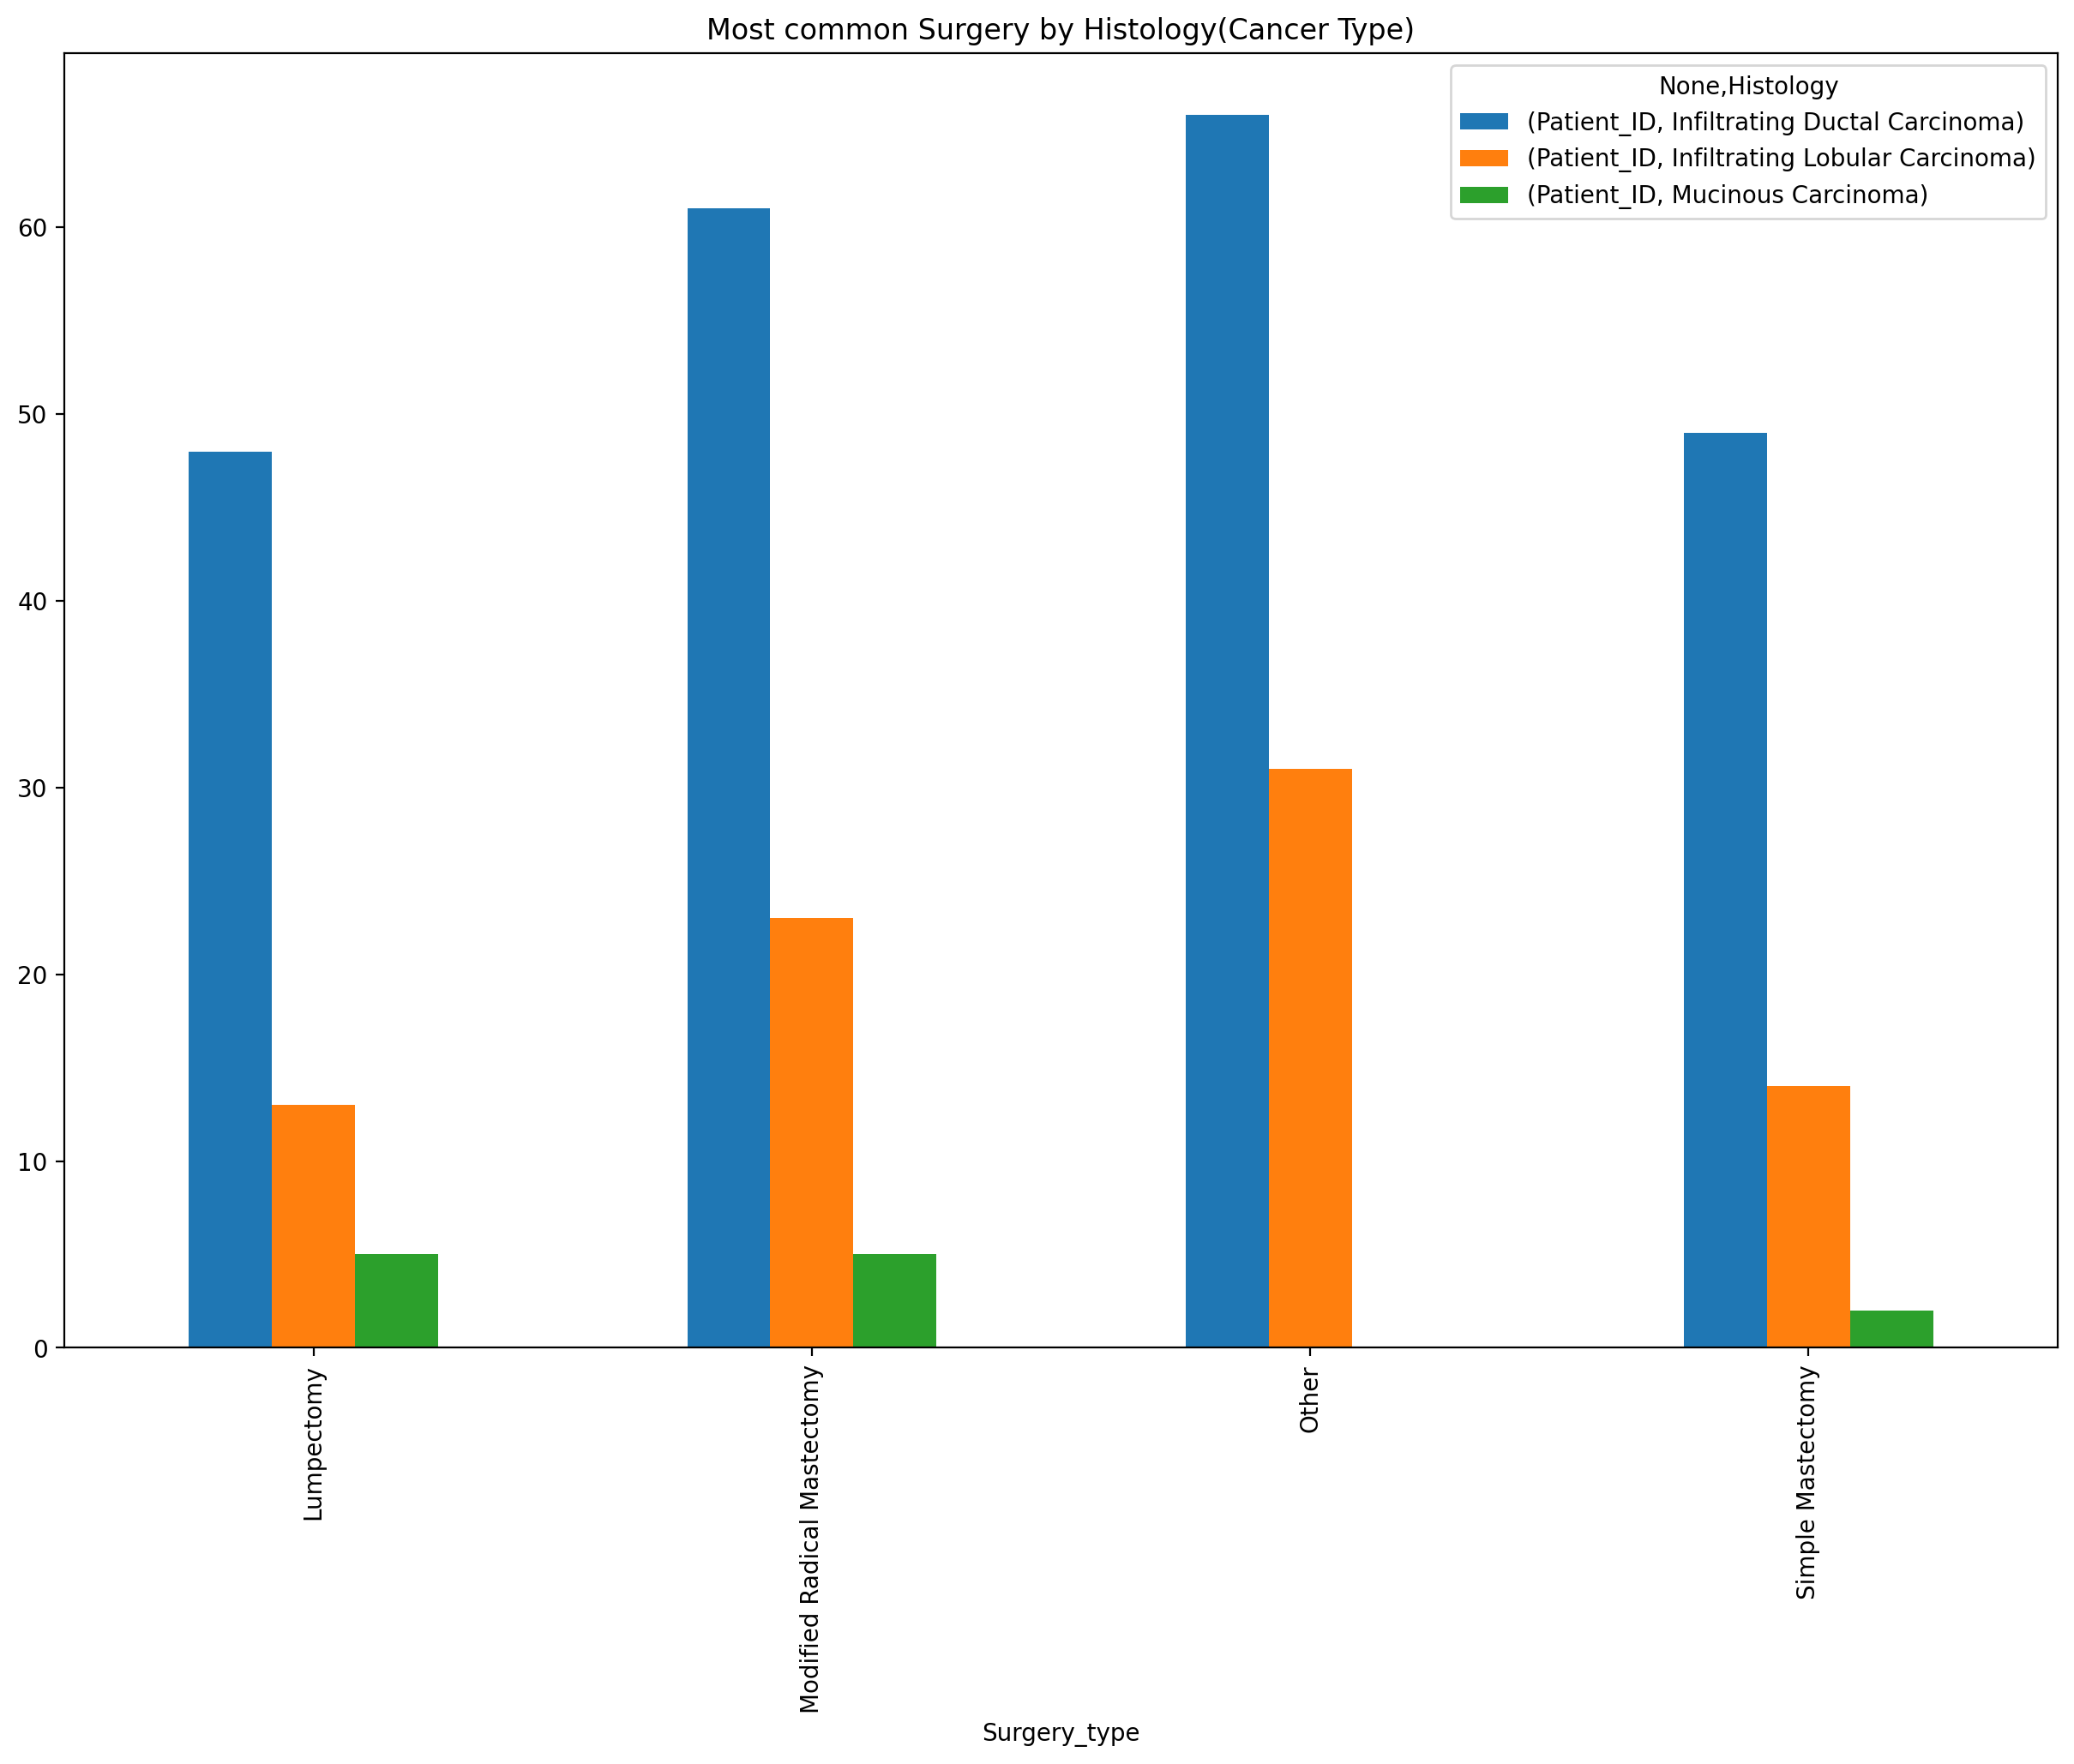

In [ ]:
a.unstack().plot(kind='bar',figsize=(15,10),title="Most common Surgery by Histology(Cancer Type)")
plt.show()

In [ ]:
a = pd.DataFrame(df.groupby(['Surgery_type','Patient_Status']).count()['Patient_ID'])
a

Patient_ID
Surgery_type                Patient_Status            
Lumpectomy                  Alive                   57
                            Dead                     9
Modified Radical Mastectomy Alive                   72
                            Dead                    17
Other                       Alive                   73
                            Dead                    24
Simple Mastectomy           Alive                   53
                            Dead                    12

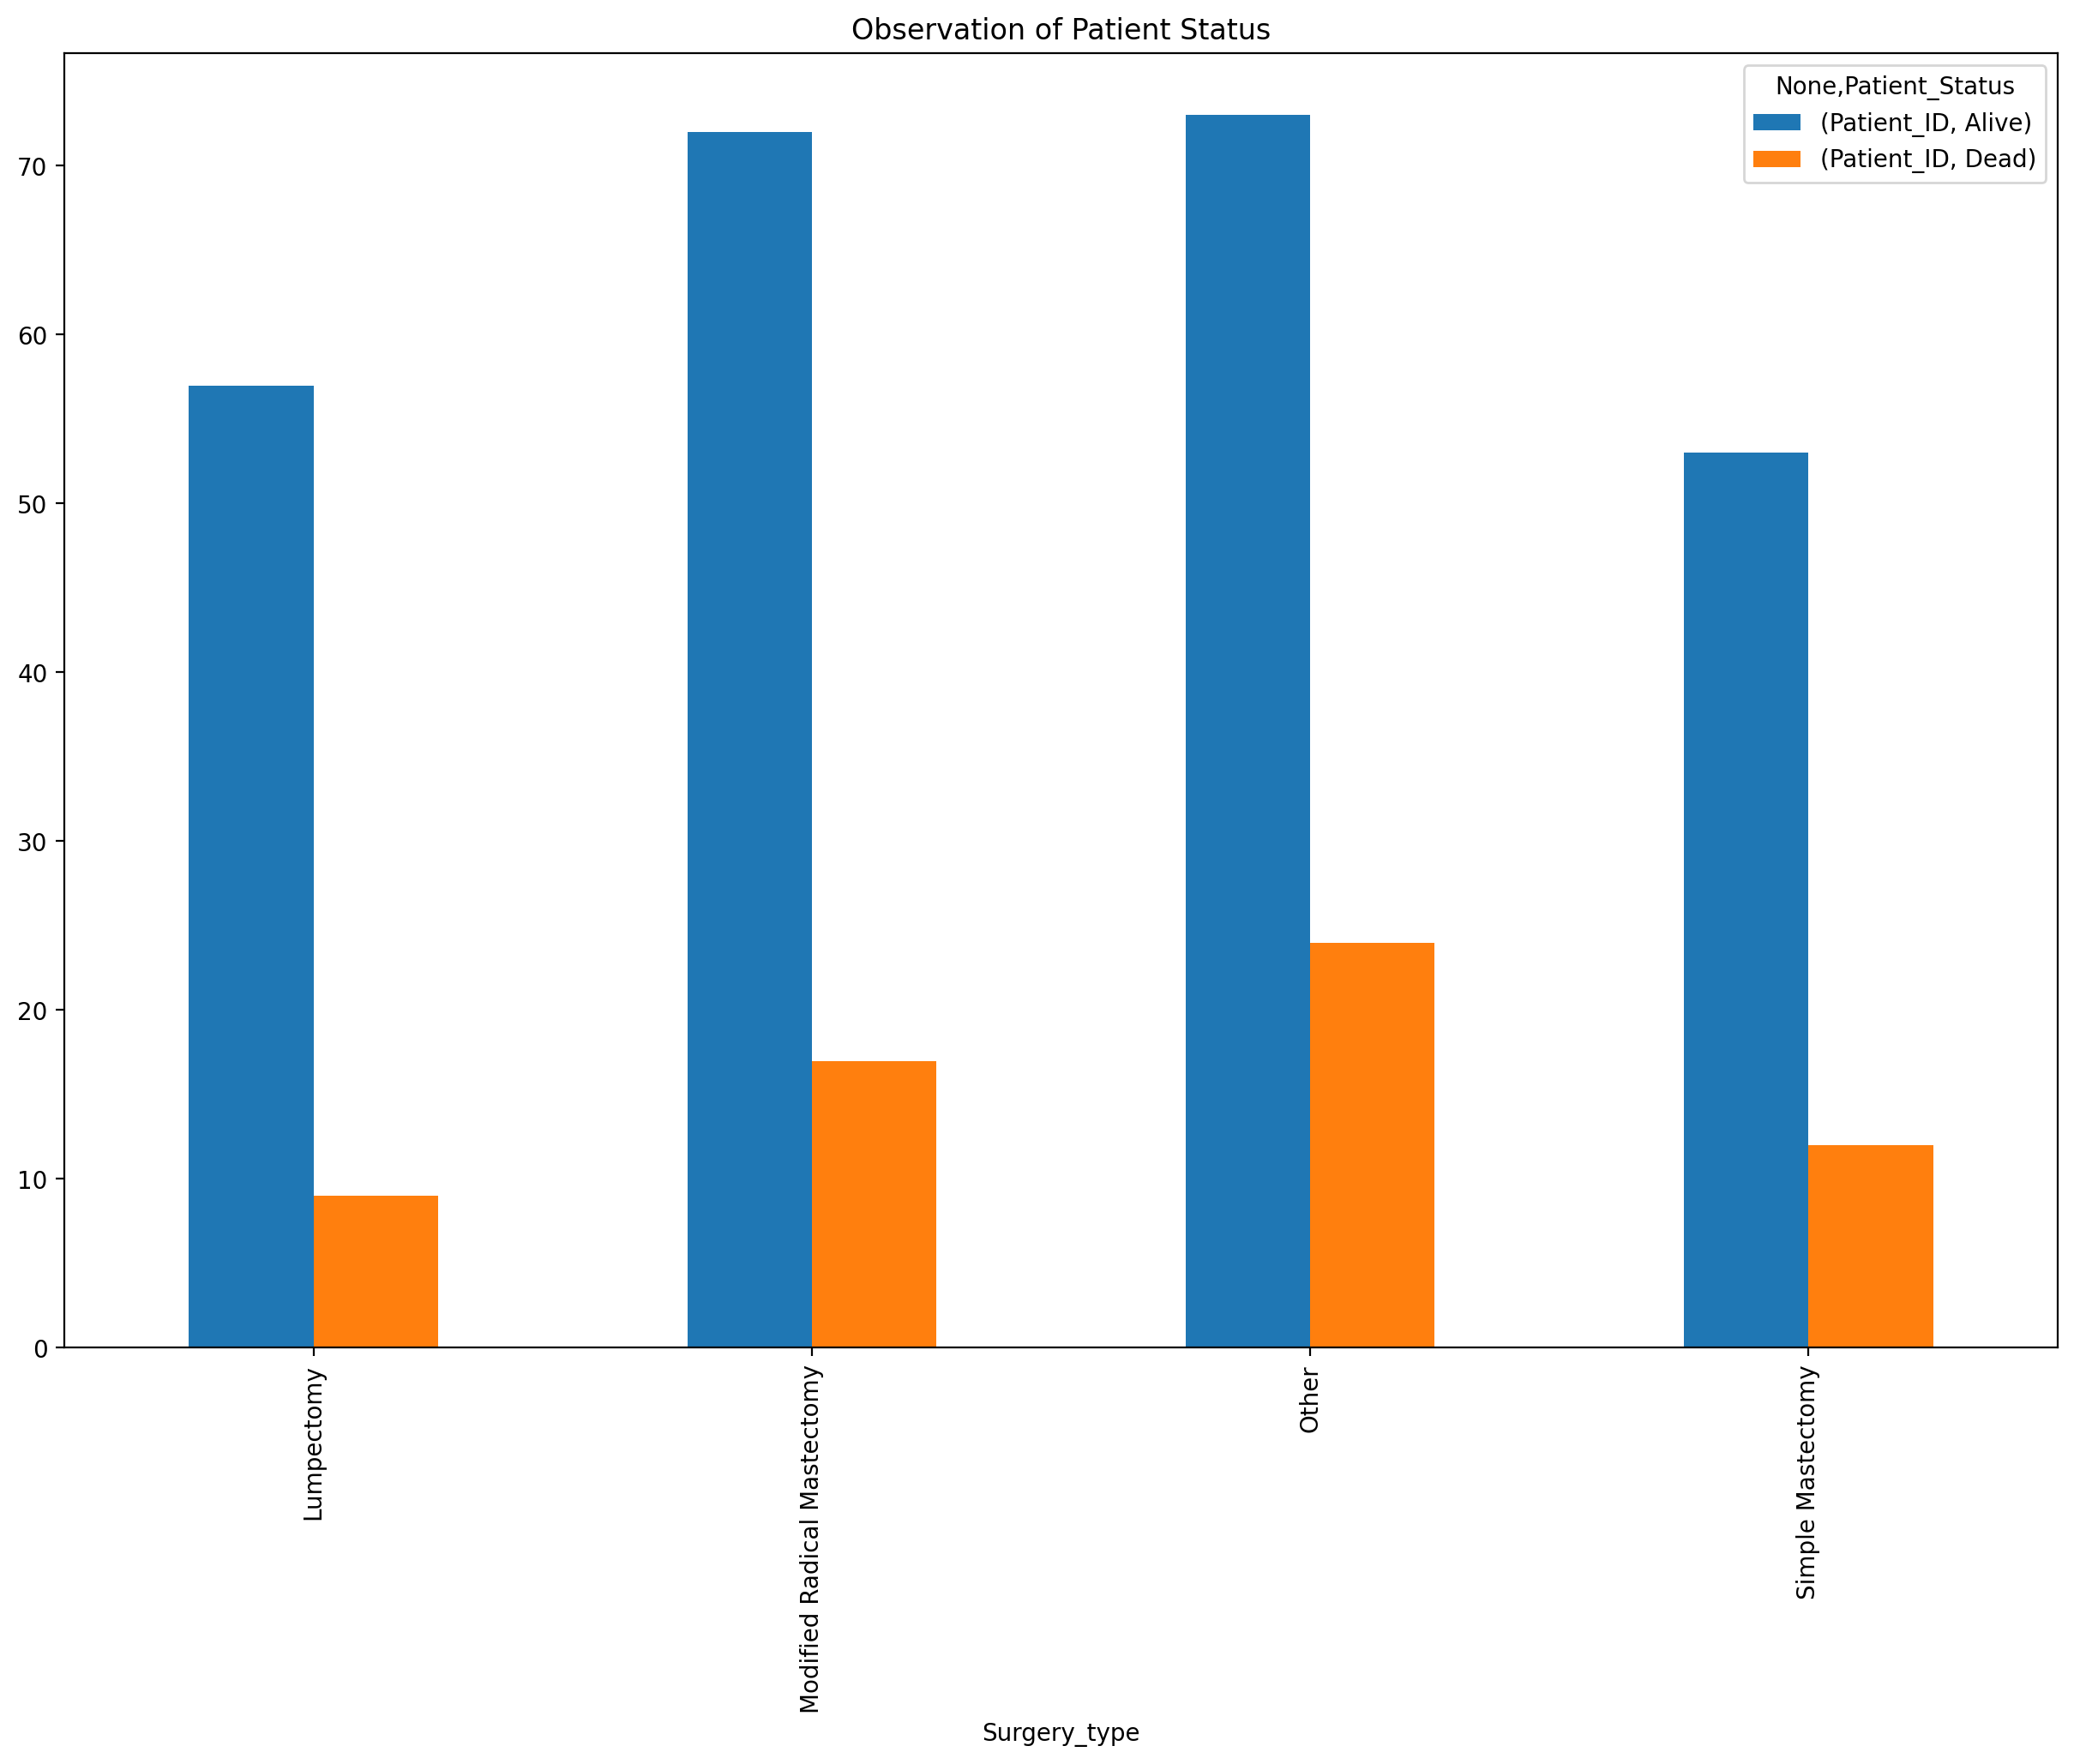

In [ ]:
a.unstack().plot(kind='bar', figsize=(15,10), title="Observation of Patient Status")
plt.show()

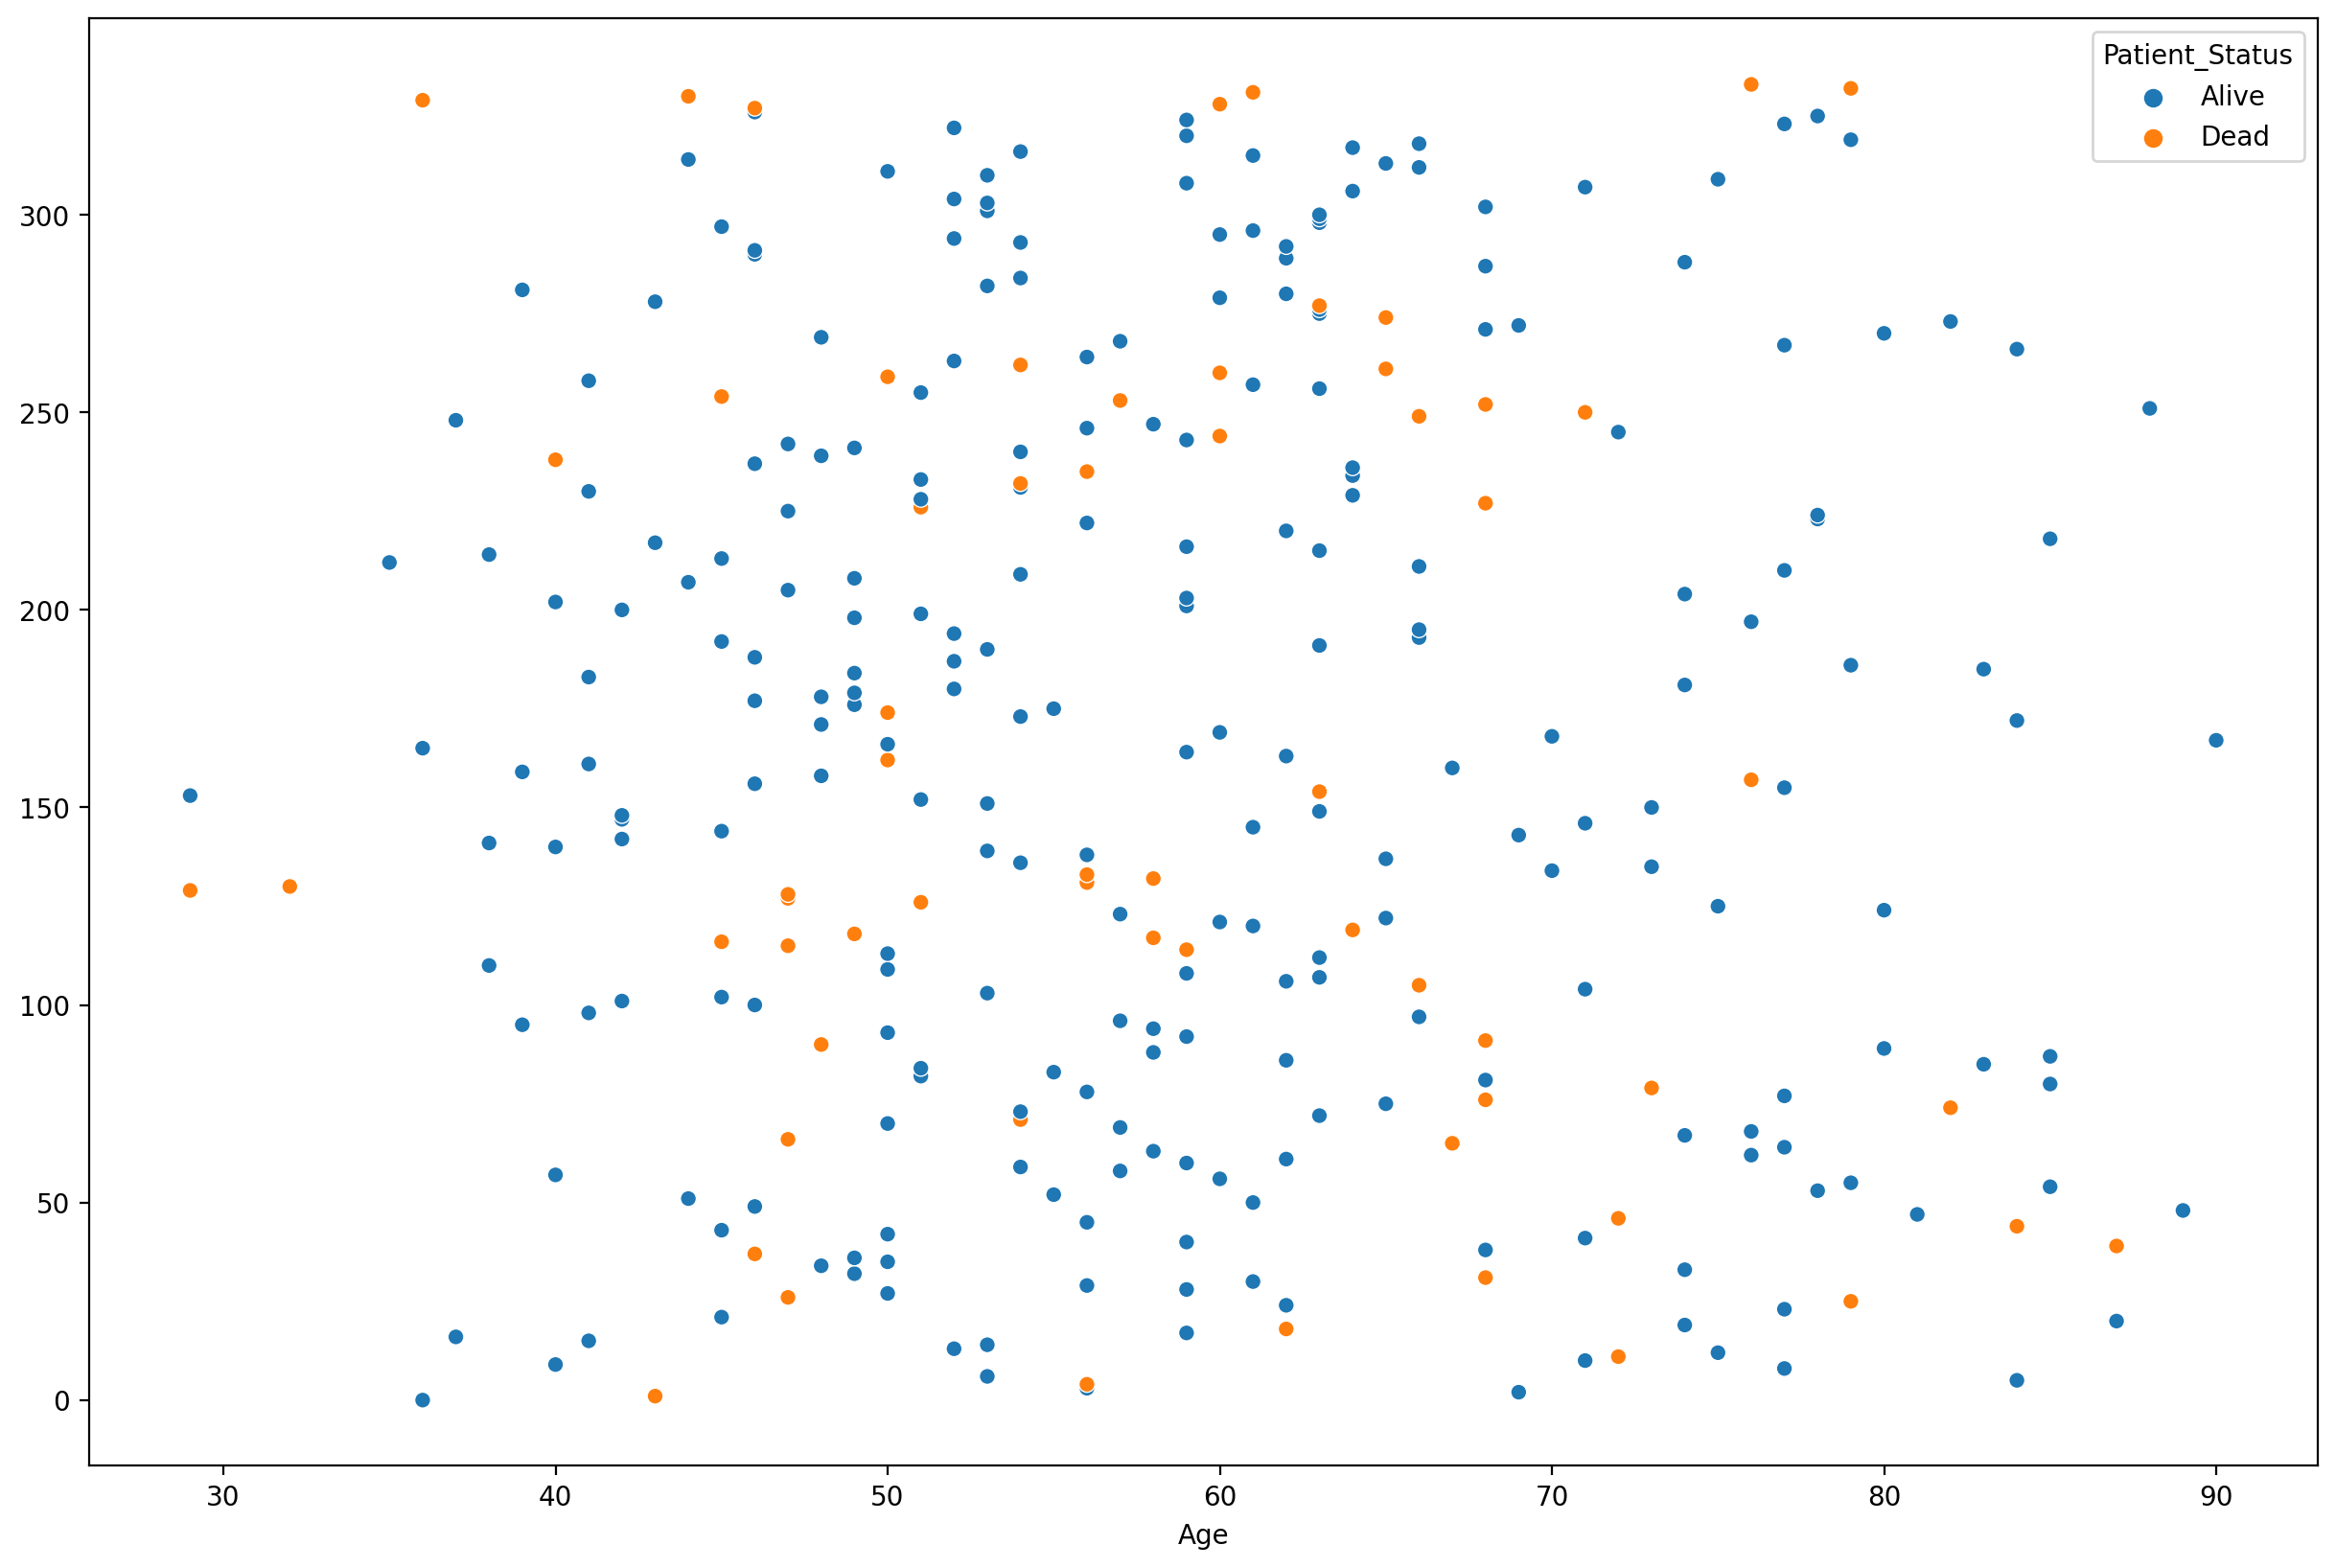

In [ ]:
#"Patient Status by Age"
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age',y=df.index,hue=df['Patient_Status'], data=df)
plt.show()

In [ ]:
a = pd.DataFrame(df.groupby(by=['Surgery_type','Patient_Status']).count()['Patient_ID'] / df.groupby(by=['Surgery_type']).count()['Patient_ID']*100)
a['Patient_ID'] = a['Patient_ID'].round(2)
a

Patient_ID
Surgery_type                Patient_Status            
Lumpectomy                  Alive                86.36
                            Dead                 13.64
Modified Radical Mastectomy Alive                80.90
                            Dead                 19.10
Other                       Alive                75.26
                            Dead                 24.74
Simple Mastectomy           Alive                81.54
                            Dead                 18.46

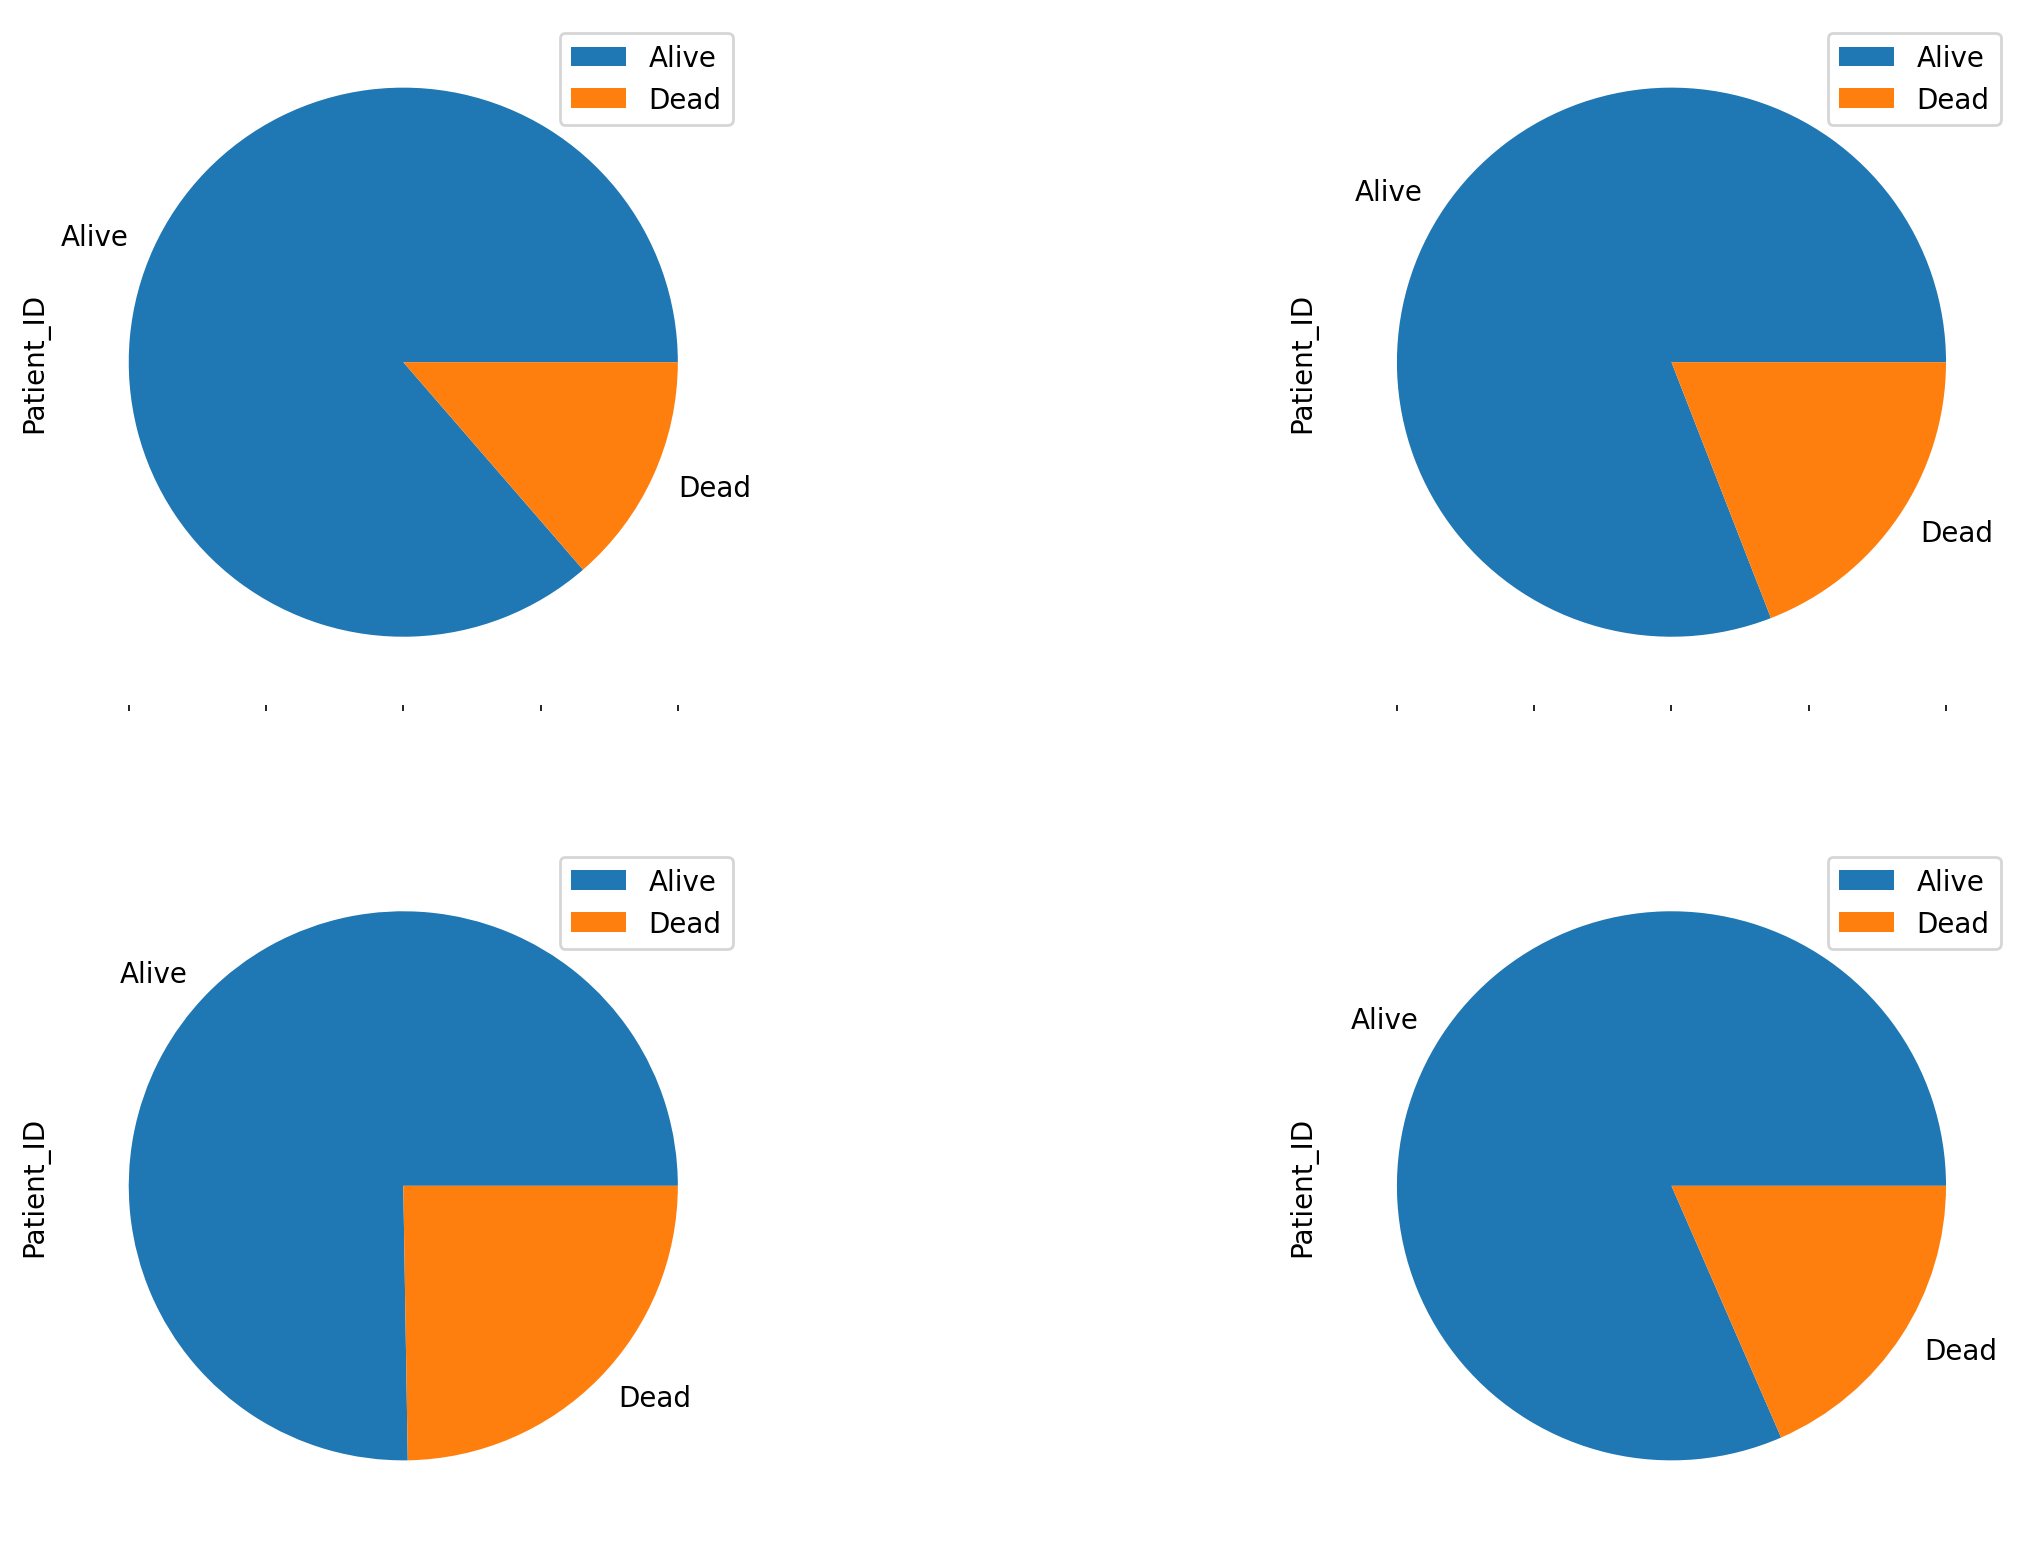

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, code in zip(axs.flat, a.index.levels[0]):
    a.xs(code).plot(kind='pie', subplots=True, ax=ax, xlabel=code, sharex=True)
  
plt.show()